In [3]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [4]:
### importing matplolib, seanborn, pandas, numpy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [6]:
###reading the data set usin pandas
app_data = pd.read_csv("application_data.csv")
app_data.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app_data.shape

(25233, 122)

In [8]:
prev_app=pd.read_csv("previous_application.csv")
prev_app.head()-

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
###Check if the app data is having duplicates or not?, if yes, how many?
app_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25228    False
25229    False
25230    False
25231    False
25232    False
Length: 25233, dtype: bool

In [10]:
###Check if the prev application data is having duplicates or not?, if yes, how many?
prev_app.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68314    False
68315    False
68316    False
68317    False
68318    False
Length: 68319, dtype: bool

In [11]:
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [12]:
##droping the column whose null value is greater that 40%
app_data.isnull().mean()[(app_data.isnull().mean()*100)>40]*100
drop_cols=list((app_data.isnull().mean()[(app_data.isnull().mean()*100)>40]*100).index)
app_data.drop(drop_cols, axis=1, inplace=True)


In [13]:
### checking the shape after the dropping
app_data.shape

(25233, 73)

In [14]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25233 entries, 0 to 25232
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   25233 non-null  int64  
 1   TARGET                       25233 non-null  int64  
 2   NAME_CONTRACT_TYPE           25233 non-null  object 
 3   CODE_GENDER                  25233 non-null  object 
 4   FLAG_OWN_CAR                 25233 non-null  object 
 5   FLAG_OWN_REALTY              25233 non-null  object 
 6   CNT_CHILDREN                 25233 non-null  int64  
 7   AMT_INCOME_TOTAL             25233 non-null  float64
 8   AMT_CREDIT                   25233 non-null  float64
 9   AMT_ANNUITY                  25233 non-null  float64
 10  AMT_GOODS_PRICE              25215 non-null  float64
 11  NAME_TYPE_SUITE              25130 non-null  object 
 12  NAME_INCOME_TYPE             25233 non-null  object 
 13  NAME_EDUCATION_T

In [15]:
###droppig the irrevelant columns
app_data.drop(["REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_2","EXT_SOURCE_3"], axis=1, inplace=True)

In [16]:
#### checking missing values
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  18
NAME_TYPE_SUITE                 103
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
FLAG_MOBIL                        1
OCCUPATION_TYPE                7888
CNT_FAM_MEMBERS                   1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION       1
ORGANIZATION_TYPE                 1
OBS_30_CNT_SOCIAL_CIRCLE         89
DEF_30_CNT_SOCIAL_CIRCLE         89
OBS_60_CNT_SOCIAL_CIRCLE    

In [17]:
###checking missing values in Annuity
app_data.AMT_ANNUITY.median()

24961.5

In [18]:
app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(), inplace=True)


In [19]:
app_data.AMT_ANNUITY.isna().sum()

0

In [20]:
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  18
NAME_TYPE_SUITE                 103
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
FLAG_MOBIL                        1
OCCUPATION_TYPE                7888
CNT_FAM_MEMBERS                   1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION       1
ORGANIZATION_TYPE                 1
OBS_30_CNT_SOCIAL_CIRCLE         89
DEF_30_CNT_SOCIAL_CIRCLE         89
OBS_60_CNT_SOCIAL_CIRCLE    

In [21]:
app_data.AMT_GOODS_PRICE.isna().sum()

18

In [22]:
app_data.AMT_GOODS_PRICE.median()

450000.0

In [23]:
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(), inplace=True)


In [24]:
app_data.AMT_GOODS_PRICE.isna().sum()

0

In [25]:
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 103
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
FLAG_MOBIL                        1
OCCUPATION_TYPE                7888
CNT_FAM_MEMBERS                   1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION       1
ORGANIZATION_TYPE                 1
OBS_30_CNT_SOCIAL_CIRCLE         89
DEF_30_CNT_SOCIAL_CIRCLE         89
OBS_60_CNT_SOCIAL_CIRCLE    

In [26]:
app_data.NAME_TYPE_SUITE.isna().sum()

103

In [27]:
app_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      20369
Family              3331
Spouse, partner      931
Children             286
Other_B              132
NaN                  103
Other_A               58
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64

In [28]:
app_data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [29]:
app_data.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)

In [30]:
app_data.NAME_TYPE_SUITE.isna().sum()

0

In [31]:
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
FLAG_MOBIL                        1
OCCUPATION_TYPE                7888
CNT_FAM_MEMBERS                   1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION       1
ORGANIZATION_TYPE                 1
OBS_30_CNT_SOCIAL_CIRCLE         89
DEF_30_CNT_SOCIAL_CIRCLE         89
OBS_60_CNT_SOCIAL_CIRCLE    

In [32]:
app_data.OCCUPATION_TYPE.isna().sum()

7888

In [33]:
app_data.OCCUPATION_TYPE.value_counts(dropna=False)

NaN                      7888
Laborers                 4499
Sales staff              2660
Core staff               2265
Managers                 1699
Drivers                  1522
High skill tech staff     943
Accountants               811
Medicine staff            721
Security staff            566
Cooking staff             483
Cleaning staff            366
Private service staff     238
Low-skill Laborers        197
Secretaries               110
Waiters/barmen staff      101
Realty agents              72
HR staff                   48
IT staff                   44
Name: OCCUPATION_TYPE, dtype: int64

In [34]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 25.938311
Sales staff              15.335832
Core staff               13.058518
Managers                  9.795330
Drivers                   8.774863
High skill tech staff     5.436725
Accountants               4.675699
Medicine staff            4.156818
Security staff            3.263188
Cooking staff             2.784664
Cleaning staff            2.110118
Private service staff     1.372153
Low-skill Laborers        1.135774
Secretaries               0.634189
Waiters/barmen staff      0.582300
Realty agents             0.415105
HR staff                  0.276737
IT staff                  0.253675
Name: OCCUPATION_TYPE, dtype: float64

In [35]:
app_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [36]:
app_data.NAME_FAMILY_STATUS.value_counts()

Married                 16288
Single / not married     3630
Civil marriage           2450
Separated                1571
Widow                    1293
Name: NAME_FAMILY_STATUS, dtype: int64

In [37]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25233 entries, 0 to 25232
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   25233 non-null  int64  
 1   TARGET                       25233 non-null  int64  
 2   NAME_CONTRACT_TYPE           25233 non-null  object 
 3   CODE_GENDER                  25233 non-null  object 
 4   FLAG_OWN_CAR                 25233 non-null  object 
 5   FLAG_OWN_REALTY              25233 non-null  object 
 6   CNT_CHILDREN                 25233 non-null  int64  
 7   AMT_INCOME_TOTAL             25233 non-null  float64
 8   AMT_CREDIT                   25233 non-null  float64
 9   AMT_ANNUITY                  25233 non-null  float64
 10  AMT_GOODS_PRICE              25233 non-null  float64
 11  NAME_TYPE_SUITE              25233 non-null  object 
 12  NAME_INCOME_TYPE             25233 non-null  object 
 13  NAME_EDUCATION_T

In [38]:
app_data.drop(["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1, inplace=True)

In [39]:
app_data.shape

(25233, 26)

In [41]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25233 entries, 0 to 25232
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   25233 non-null  int64  
 1   TARGET                       25233 non-null  int64  
 2   NAME_CONTRACT_TYPE           25233 non-null  object 
 3   CODE_GENDER                  25233 non-null  object 
 4   FLAG_OWN_CAR                 25233 non-null  object 
 5   FLAG_OWN_REALTY              25233 non-null  object 
 6   CNT_CHILDREN                 25233 non-null  int64  
 7   AMT_INCOME_TOTAL             25233 non-null  float64
 8   AMT_CREDIT                   25233 non-null  float64
 9   AMT_ANNUITY                  25233 non-null  float64
 10  AMT_GOODS_PRICE              25233 non-null  float64
 11  NAME_TYPE_SUITE              25233 non-null  object 
 12  NAME_INCOME_TYPE             25233 non-null  object 
 13  NAME_EDUCATION_T

In [42]:
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
FLAG_MOBIL                        1
OCCUPATION_TYPE                7888
CNT_FAM_MEMBERS                   1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION       1
ORGANIZATION_TYPE                 1
DAYS_LAST_PHONE_CHANGE            2
dtype: int64

In [43]:
app_data.DAYS_LAST_PHONE_CHANGE.value_counts(dropna=False)

 0.0       3057
-1.0        232
-2.0        185
-3.0        159
-4.0        125
           ... 
-3375.0       1
-3983.0       1
-3401.0       1
-2548.0       1
-3206.0       1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3186, dtype: int64

In [44]:
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
FLAG_MOBIL                        1
OCCUPATION_TYPE                7888
CNT_FAM_MEMBERS                   1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION       1
ORGANIZATION_TYPE                 1
DAYS_LAST_PHONE_CHANGE            2
dtype: int64

In [45]:
###droping DAYS_LAST_PHONE_CHANGE
app_data.drop("DAYS_LAST_PHONE_CHANGE", axis=1, inplace=True)


In [46]:
####outliers
app_data.DAYS_BIRTH.head(50)

0     -9461.0
1    -16765.0
2    -19046.0
3    -19005.0
4    -19932.0
5    -16941.0
6    -13778.0
7    -18850.0
8    -20099.0
9    -14469.0
10   -10197.0
11   -20417.0
12   -13439.0
13   -14086.0
14   -14583.0
15    -8728.0
16   -12931.0
17    -9776.0
18   -17718.0
19   -11348.0
20   -18252.0
21   -14815.0
22   -11146.0
23   -24827.0
24   -11286.0
25   -19334.0
26   -18724.0
27   -15948.0
28    -9994.0
29   -10341.0
30   -15280.0
31   -11144.0
32   -12974.0
33   -11694.0
34   -15997.0
35   -12158.0
36   -17199.0
37   -21077.0
38   -23920.0
39   -16126.0
40   -17482.0
41   -16971.0
42   -13384.0
43   -23548.0
44    -9827.0
45    -7974.0
46   -20373.0
47   -20121.0
48   -19727.0
49   -18264.0
Name: DAYS_BIRTH, dtype: float64

In [47]:
app_data["DAYS_BIRTH_Year"]= app_data["DAYS_BIRTH"].apply(lambda x : x//365)

In [48]:
app_data["DAYS_BIRTH_Year"]= abs(app_data["DAYS_BIRTH_Year"])
app_data.DAYS_BIRTH_Year.value_counts()

38.0    757
39.0    733
32.0    727
41.0    713
40.0    712
42.0    705
33.0    684
34.0    681
44.0    681
28.0    675
55.0    660
36.0    643
29.0    639
43.0    635
45.0    632
35.0    632
30.0    631
37.0    628
47.0    624
31.0    618
54.0    596
46.0    595
49.0    587
48.0    585
53.0    575
56.0    555
58.0    551
52.0    546
57.0    545
50.0    530
51.0    524
60.0    523
59.0    482
61.0    481
62.0    475
64.0    451
63.0    426
65.0    414
27.0    384
26.0    348
24.0    346
25.0    302
23.0    251
66.0    244
67.0    175
68.0    165
22.0     96
69.0     70
Name: DAYS_BIRTH_Year, dtype: int64

In [49]:
app_data.CNT_CHILDREN.value_counts()

0    17671
1     5050
2     2143
3      320
4       36
5        8
6        2
7        1
8        1
9        1
Name: CNT_CHILDREN, dtype: int64

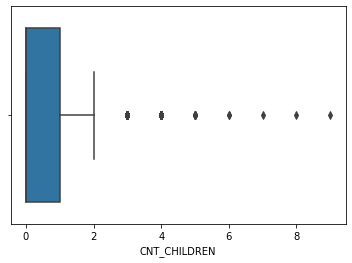

In [50]:
##checking the oulier for No. Children
sns.boxplot(app_data.CNT_CHILDREN)
plt.show()

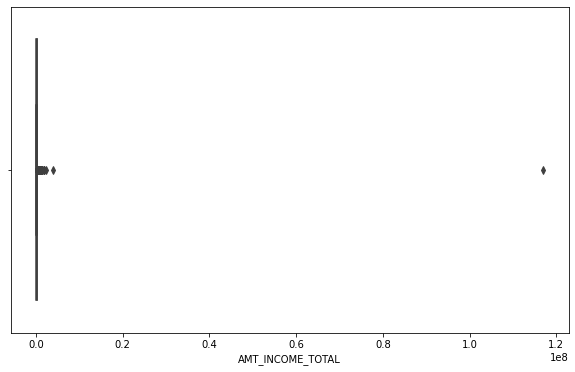

In [51]:
#### checkinf the oulier for Income of the client
plt.figure(figsize=[10,6])
sns.boxplot(app_data.AMT_INCOME_TOTAL)

In [52]:
app_data.AMT_INCOME_TOTAL.quantile([0.05, 0.1, 0.20, 0.50, 0.95])

0.05     67500.0
0.10     81000.0
0.20     99000.0
0.50    144000.0
0.95    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
app_data[app_data.AMT_INCOME_TOTAL>337500]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_BIRTH_Year
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-18850.0,-449.0,1.0,Managers,2.0,0.0,0.0,0.0,Other,52.0
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,-11146.0,-4306.0,1.0,Sales staff,3.0,0.0,0.0,0.0,Self-employed,31.0
33,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,-11694.0,-2060.0,1.0,Drivers,3.0,0.0,0.0,0.0,Self-employed,33.0
49,100056,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,49927.5,...,-18264.0,-9523.0,1.0,Laborers,2.0,0.0,0.0,0.0,Transport: type 2,51.0
51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-18632.0,-6977.0,1.0,Managers,3.0,0.0,0.0,0.0,Services,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25144,129245,0,Cash loans,F,Y,Y,0,450000.0,1042560.0,34587.0,...,-16399.0,-2703.0,1.0,Accountants,2.0,0.0,0.0,0.0,Self-employed,45.0
25170,129272,0,Cash loans,M,Y,N,2,450000.0,537763.5,33030.0,...,-14166.0,-5097.0,1.0,Core staff,4.0,0.0,0.0,0.0,Military,39.0
25191,129296,0,Cash loans,F,N,Y,1,450000.0,755190.0,36459.0,...,-19323.0,-11114.0,1.0,NaN,3.0,0.0,0.0,0.0,Military,53.0
25193,129300,0,Cash loans,M,N,N,0,360000.0,728460.0,57555.0,...,-15239.0,-209.0,1.0,Drivers,2.0,1.0,1.0,0.0,Transport: type 3,42.0


In [54]:
app_data[app_data.AMT_INCOME_TOTAL<67500]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_BIRTH_Year
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,-20417.0,365243.0,1.0,NaN,2.0,0.0,0.0,0.0,XNA,56.0
50,100058,0,Revolving loans,F,N,Y,0,54000.000,135000.0,6750.0,...,-12406.0,-1176.0,1.0,Core staff,2.0,0.0,0.0,0.0,School,34.0
100,100119,0,Revolving loans,F,N,Y,0,54000.000,180000.0,9000.0,...,-11142.0,-2419.0,1.0,Medicine staff,2.0,0.0,0.0,0.0,Medicine,31.0
144,100166,0,Cash loans,F,N,Y,3,58500.000,152820.0,15241.5,...,-14359.0,-1894.0,1.0,Core staff,5.0,0.0,0.0,0.0,Government,40.0
157,100185,0,Cash loans,M,N,Y,0,58500.000,187704.0,10903.5,...,-20215.0,365243.0,1.0,NaN,2.0,0.0,0.0,0.0,XNA,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25102,129198,0,Cash loans,M,N,Y,0,49500.000,104256.0,10813.5,...,-10020.0,-566.0,1.0,Laborers,1.0,0.0,0.0,0.0,Business Entity Type 3,28.0
25108,129206,0,Cash loans,F,Y,Y,0,40500.000,199080.0,11245.5,...,-23578.0,365243.0,1.0,NaN,1.0,0.0,0.0,0.0,XNA,65.0
25139,129240,0,Cash loans,F,N,Y,0,36000.000,112068.0,11898.0,...,-14763.0,-1999.0,1.0,NaN,2.0,0.0,0.0,0.0,Government,41.0
25205,129316,0,Cash loans,M,N,Y,0,47250.000,109453.5,11623.5,...,-24186.0,365243.0,1.0,NaN,2.0,0.0,0.0,0.0,XNA,67.0


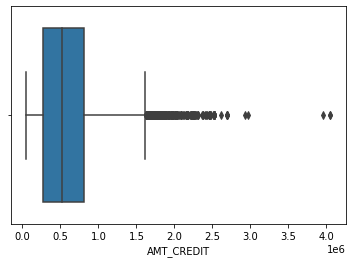

In [55]:
###checking the outlier for Credit amount of the loan
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

In [56]:
app_data.AMT_CREDIT.describe()

count    2.523300e+04
mean     5.993395e+05
std      4.018626e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

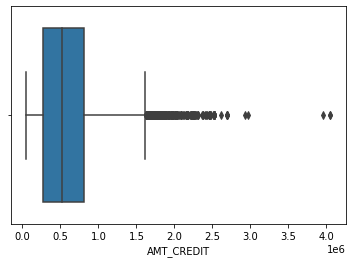

In [57]:
### checking th3 eoutlier forFor consumer loans it is the price of the goods for which the loan is given
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

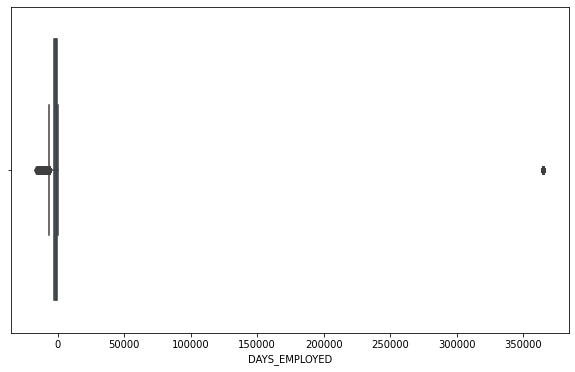

In [58]:
    ####checking the outliers of How many days before the application the person started current employment
plt.figure(figsize=[10,6])

sns.boxplot(app_data.DAYS_EMPLOYED)
plt.show()

# binnig

In [72]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25233 entries, 0 to 25232
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   25233 non-null  int64   
 1   TARGET                       25233 non-null  int64   
 2   NAME_CONTRACT_TYPE           25233 non-null  object  
 3   CODE_GENDER                  25233 non-null  object  
 4   FLAG_OWN_CAR                 25233 non-null  object  
 5   FLAG_OWN_REALTY              25233 non-null  object  
 6   CNT_CHILDREN                 25233 non-null  int64   
 7   AMT_INCOME_TOTAL             25233 non-null  float64 
 8   AMT_CREDIT                   25233 non-null  float64 
 9   AMT_ANNUITY                  25233 non-null  float64 
 10  AMT_GOODS_PRICE              25233 non-null  float64 
 11  NAME_TYPE_SUITE              25233 non-null  object  
 12  NAME_INCOME_TYPE             25233 non-null  object  
 13  N

In [73]:
app_data.DAYS_EMPLOYED.head()

0    -637.0
1   -1188.0
2    -225.0
3   -3039.0
4   -3038.0
Name: DAYS_EMPLOYED, dtype: float64

In [74]:
app_data["Year_employed"]= abs(app_data.DAYS_EMPLOYED.apply(lambda x : x/365))

In [75]:
app_data["Year_employed"].head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: Year_employed, dtype: float64

In [76]:
app_data["Year_employed"].max()

1000.6657534246575

In [77]:
app_data["Year_employed"].min()

0.0

In [78]:
app_data["Year_employed"].value_counts()

1000.665753    4512
0.545205         19
1.052055         18
0.695890         18
0.416438         18
               ... 
15.046575         1
11.695890         1
14.490411         1
11.002740         1
20.254795         1
Name: Year_employed, Length: 6377, dtype: int64

In [79]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)


In [80]:
app_data['AMT_INCOME_RANGE']

0        200000-225000
1        250000-275000
2          50000-75000
3        125000-150000
4        100000-125000
             ...      
25228    150000-175000
25229      50000-75000
25230    150000-175000
25231    250000-275000
25232     75000,100000
Name: AMT_INCOME_RANGE, Length: 25233, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' < ... <
                          '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [81]:
# Creating bins for credit amount
app_data.AMT_CREDIT

0         406597.5
1        1293502.5
2         135000.0
3         312682.5
4         513000.0
           ...    
25228     868500.0
25229      61263.0
25230     900000.0
25231     270000.0
25232     923454.0
Name: AMT_CREDIT, Length: 25233, dtype: float64

In [82]:
bins=[0, 100000, 200000, 300000, 400000, 500000,600000,700000,800000, 900000, 1000000, 10000000000]
slots = ["0-100000", "100000-200000", "200000-300000", "300000-400000", "400000-500000",  "500000-600000", "600000-700000", "700000-800000", "800000-900000", "900000-1000000", "1000000 & above"]
app_data["AMT_CREDIT_Range"]= pd.cut(app_data["AMT_CREDIT"], bins=bins, labels=slots)

In [83]:
app_data["AMT_CREDIT_Range"]

0          400000-500000
1        1000000 & above
2          100000-200000
3          300000-400000
4          500000-600000
              ...       
25228      800000-900000
25229           0-100000
25230      800000-900000
25231      200000-300000
25232     900000-1000000
Name: AMT_CREDIT_Range, Length: 25233, dtype: category
Categories (11, object): ['0-100000' < '100000-200000' < '200000-300000' < '300000-400000' < ... <
                          '700000-800000' < '800000-900000' < '900000-1000000' < '1000000 & above']

In [84]:
##checking the target imbalance
app_data.TARGET.value_counts(normalize=True)*100


0    92.010462
1     7.989538
Name: TARGET, dtype: float64

# Data Visualization

##Creating the two dataframes with 1 and 0
###where 1 is a defaulter and 0 is non defaulter

In [85]:
df_1 = app_data[app_data["TARGET"]==1]
df_0 = app_data[app_data["TARGET"]==0]

In [86]:
df_1.TARGET.value_counts()

1    2016
Name: TARGET, dtype: int64

In [87]:
df_1.CODE_GENDER.value_counts()

F    1153
M     863
Name: CODE_GENDER, dtype: int64

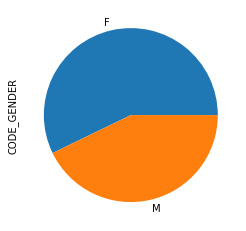

In [88]:
###so here we will check the defaulter in male vs female
df_1.CODE_GENDER.value_counts().plot.pie()
plt.show()

In [89]:
##so we can say here that the female are the most defaulter in then male

In [90]:
df_0.CODE_GENDER.value_counts()

F    15470
M     7747
Name: CODE_GENDER, dtype: int64

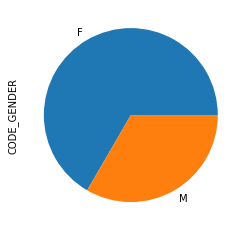

In [91]:
###so here we will check the non defaulter in male vs female
df_0.CODE_GENDER.value_counts().plot.pie()
plt.show()

In [92]:
### so in this sight we can say that females are the most non defaulter 

In [93]:
df_1.FLAG_OWN_CAR.value_counts()

N    1385
Y     631
Name: FLAG_OWN_CAR, dtype: int64

In [94]:
###we will chedck the defaulter and non defaulter who own car 

<function matplotlib.pyplot.show>

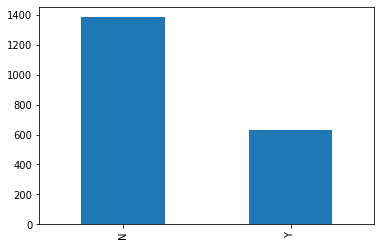

In [95]:
###for the defaulter who own car and who don't own car
df_1.FLAG_OWN_CAR.value_counts().plot.bar()
plt.show

In [96]:
### 1st insighnt-who dont own car are more defaulter
## 2nd insight who own car are less defaulter

<function matplotlib.pyplot.show>

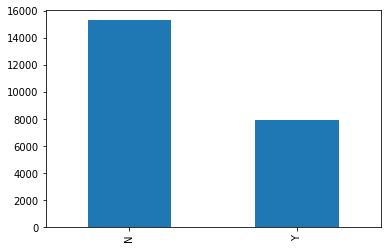

In [97]:
###for the non defaulter who own car and who don't own car
df_0.FLAG_OWN_CAR.value_counts().plot.bar()
plt.show

In [98]:
## who dont own car are more non defaulter
### who own care are less less non defaulters

In [99]:
df_1.FLAG_OWN_REALTY.value_counts()

Y    1376
N     640
Name: FLAG_OWN_REALTY, dtype: int64

In [100]:
df_0.FLAG_OWN_REALTY.value_counts()

Y    16133
N     7084
Name: FLAG_OWN_REALTY, dtype: int64

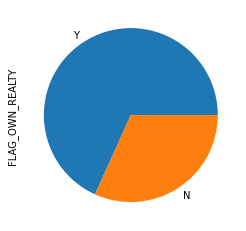

In [101]:
####checking the who own flat or home who is more defaulers
df_1.FLAG_OWN_REALTY.value_counts().plot.pie()

In [102]:
##so we can say that here who own flats are more defaulter then less than who dont own flat

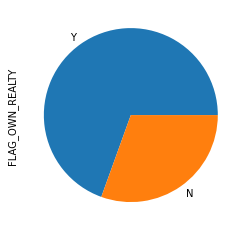

In [103]:
####checking the who own flat or home who is more non defaulers
df_0.FLAG_OWN_REALTY.value_counts().plot.pie()
plt.show()

In [104]:
##so we can say that here who own flats or houuse are more non defaulter then less than who dont own flat

###bivariate analysi

In [105]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_BIRTH_Year,Year_employed,AMT_INCOME_RANGE,AMT_CREDIT_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,0.0,0.0,0.0,Business Entity Type 3,26.0,1.745205,200000-225000,400000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Cooking staff,1.0,0.0,0.0,0.0,Business Entity Type 3,52.0,7.200000,100000-125000,900000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Laborers,2.0,0.0,0.0,0.0,Business Entity Type 3,48.0,3.457534,200000-225000,1000000 & above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,Sales staff,2.0,0.0,0.0,0.0,Self-employed,37.0,9.854795,125000-150000,200000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,NaN,2.0,0.0,0.0,0.0,XNA,68.0,1000.665753,"75000,100000",200000-300000


In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 25225
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   2016 non-null   int64   
 1   TARGET                       2016 non-null   int64   
 2   NAME_CONTRACT_TYPE           2016 non-null   object  
 3   CODE_GENDER                  2016 non-null   object  
 4   FLAG_OWN_CAR                 2016 non-null   object  
 5   FLAG_OWN_REALTY              2016 non-null   object  
 6   CNT_CHILDREN                 2016 non-null   int64   
 7   AMT_INCOME_TOTAL             2016 non-null   float64 
 8   AMT_CREDIT                   2016 non-null   float64 
 9   AMT_ANNUITY                  2016 non-null   float64 
 10  AMT_GOODS_PRICE              2016 non-null   float64 
 11  NAME_TYPE_SUITE              2016 non-null   object  
 12  NAME_INCOME_TYPE             2016 non-null   object  
 13  NA

In [107]:
df_1.CNT_FAM_MEMBERS.value_counts()

2.0     944
1.0     457
3.0     388
4.0     187
5.0      30
6.0       7
7.0       2
10.0      1
Name: CNT_FAM_MEMBERS, dtype: int64

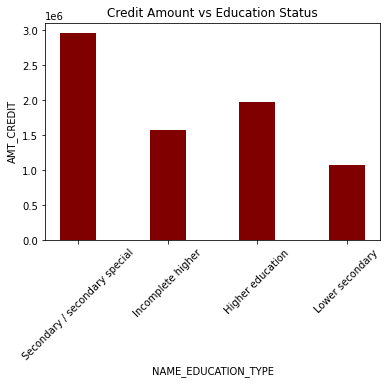

In [108]:
###EDUCATION VS AMT IN Defaulters

plt.bar(df_1["NAME_EDUCATION_TYPE"], df_1["AMT_CREDIT"], color ='maroon', width = 0.4)
 
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.title("Credit Amount vs Education Status")
plt.xticks(rotation = 45)
plt.show()

In [109]:
### inthis found that secondary people whos credit amount is high are more defaulters

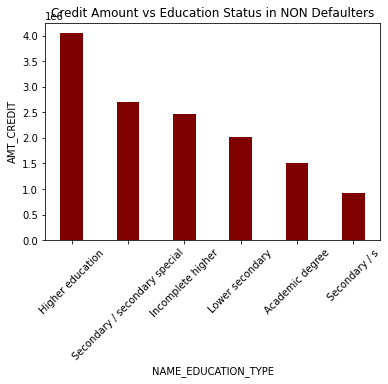

In [110]:
###EDUCATION VS AMT IN NON Defaulters

plt.bar(df_0["NAME_EDUCATION_TYPE"], df_0["AMT_CREDIT"], color ='maroon', width = 0.4)
 
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.title("Credit Amount vs Education Status in NON Defaulters")
plt.xticks(rotation = 45)
plt.show()

In [146]:
### in this plot we can say that who is higher education which have high credit amout are less defaulter

In [115]:
### numeric-numeric

0        Single / not married
1                     Married
2        Single / not married
3              Civil marriage
4        Single / not married
                 ...         
25228    Single / not married
25229          Civil marriage
25230    Single / not married
25231               Separated
25232                     NaN
Name: NAME_FAMILY_STATUS, Length: 25233, dtype: object

In [130]:
df_0["YEAR_BIRTH"]= abs(df_0["DAYS_BIRTH"].apply(lambda x : x//365))
df_0["YEAR_BIRTH"].head(3)

1    46.0
2    53.0
3    53.0
Name: YEAR_BIRTH, dtype: float64

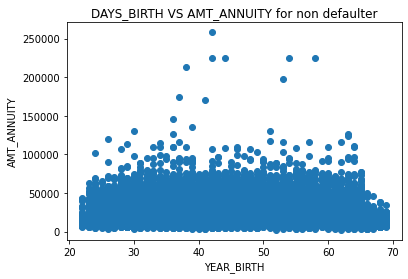

In [138]:
###DAYS_BIRTH VS AMT_ANNUITY for non defaulter

plt.scatter(x=df_0["YEAR_BIRTH"], y=df_0["AMT_ANNUITY"])
 
plt.xlabel("YEAR_BIRTH")
plt.ylabel("AMT_ANNUITY")
plt.title("DAYS_BIRTH VS AMT_ANNUITY for non defaulter")

plt.show()

In [ ]:
## in this plot we can say that whose age 22 to 68 and  there ammount ammunity are  60000 to 100000

In [144]:
df_1["YEAR_BIRTH"]= abs(df_1["DAYS_BIRTH"].apply(lambda x : x//365))
df_1["YEAR_BIRTH"]

0        26.0
26       52.0
40       48.0
42       37.0
81       68.0
         ... 
25161    29.0
25169    33.0
25183    64.0
25185    55.0
25225    29.0
Name: YEAR_BIRTH, Length: 2016, dtype: float64

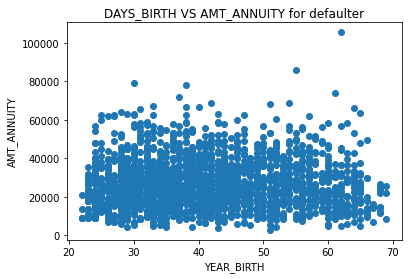

In [145]:
###DAYS_BIRTH VS AMT_ANNUITY for defaulter

plt.scatter(x=df_1["YEAR_BIRTH"], y=df_1["AMT_ANNUITY"])
 
plt.xlabel("YEAR_BIRTH")
plt.ylabel("AMT_ANNUITY")
plt.title("DAYS_BIRTH VS AMT_ANNUITY for defaulter")

plt.show()

In [ ]:
## so in thsi we can say that variation in these defaulter age between 24 to 69 and amount amunity variation between 5,000 to 63000

In [172]:
####quantify using corealtion for the defaulters


In [167]:
df_1[["YEAR_BIRTH", 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr()

,YEAR_BIRTH,AMT_INCOME_TOTAL,AMT_CREDIT
YEAR_BIRTH,1.000000,-0.010939,0.170095
AMT_INCOME_TOTAL,-0.010939,1.000000,0.009489
AMT_CREDIT,0.170095,0.009489,1.000000


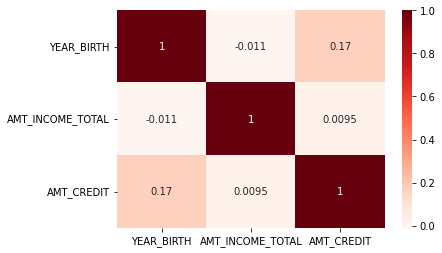

In [171]:
sns.heatmap(df_1[["YEAR_BIRTH", 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr(), annot=True, cmap="Reds")

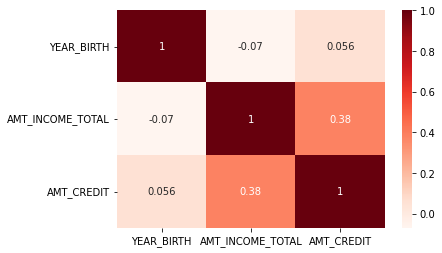

In [173]:
sns.heatmap(df_0[["YEAR_BIRTH", 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr(), annot=True, cmap="Reds")

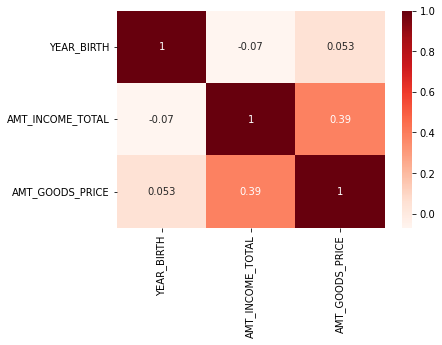

In [174]:
### corelation "YEAR_BIRTH" VS 'AMT_INCOME_TOTAL' vs 'AMT_GOODS_PRICE' for non defaulters
sns.heatmap(df_0[["YEAR_BIRTH", 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap="Reds")
plt.show()

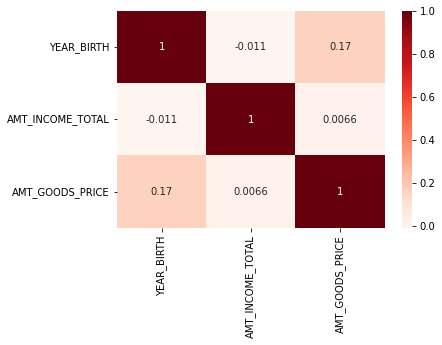

In [176]:
### corelation "YEAR_BIRTH" VS 'AMT_INCOME_TOTAL' vs 'AMT_GOODS_PRICE' for  defaulters
sns.heatmap(df_1[["YEAR_BIRTH", 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap="Reds")
plt.show()